# What is the likelihood of body/property consent in a traffic stop?

### LEGALST 123: Final Project

#### Topic: Body/Property Searches by Police Officers and Consent

##### Thalia Colarian, Nick Dhaliwal, Ryan Huntley, Daniel Jang

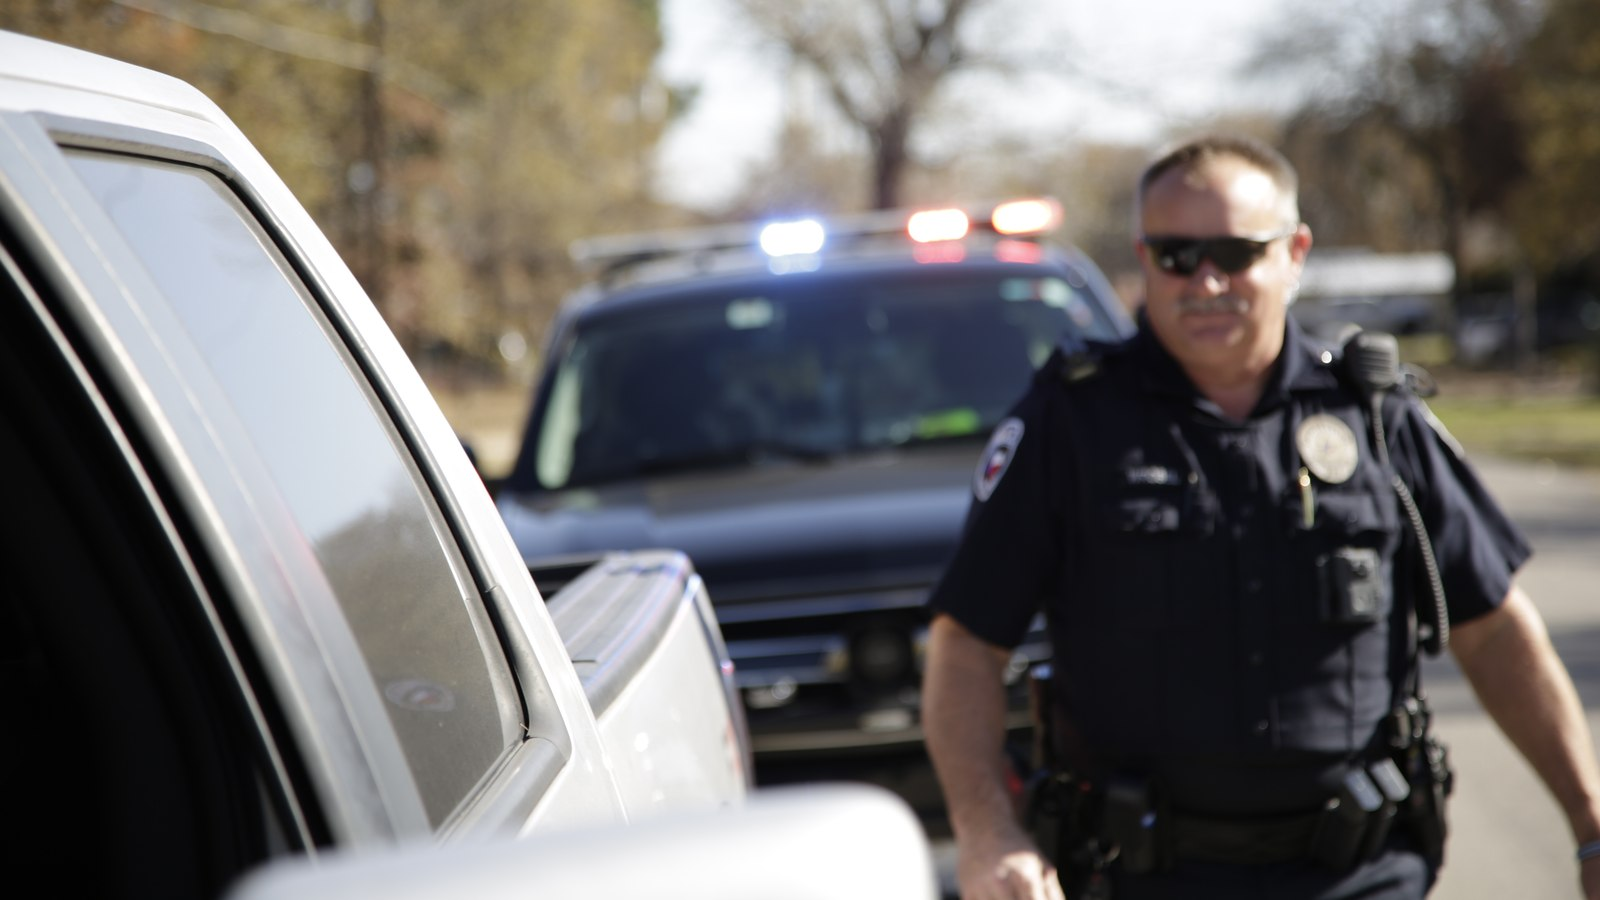

## **Introduction**
### Body/Property Searches and Consent
A police stop is defined as any detention or search (including consensual searches) by a peace officer, as per the Racial and Identity Profiling Act of 2015 (RIPA). RIPA involves the logging of basic information of every stop by a peace officer, where this data is then publicly avaialble through the database of the Office of the Attorney General. By creating greater transparency between various branches of the government and the public, we get another step closer to solving civil and police conflict, and hopefully another step closer to reducing unwarranted violence on both sides of the line.

We decided to focus on one aspect of the data: consented traffic stops. Our curiousity led to us to ask whether there is there any way to, based on a set of training data, predict whether an individual is more or less likely to consent to a traffic stop. As legal scholars and data scientists, we will do our best to formulate a specific research question and, using what we have learned, provide an answer to our inquiry.

Our goal with this data analysis project is to create a predictive model, trained on the RIPA stop data, in order to predict the likelihood of individuals of certain demographics consenting to body or property searches. The data we are looking at is from the RIPA stop data throuhgout 2019. We chose this year because data was collected for the entire year (RIPA was implemented in July of 2018) and pandemic lockdowns did not occur until 2020. Working with data in 2020 would be problematic not only because the nature of the stops are different with different populations out on the road after COVID shutdowns occured, but also because there may be more serious implications when it comes to the profiling that took place with many people wearing face masks--and this is especially significant due to RIPA being a California Act that deals with profiling. For these reasons, 2019 was the natural choice of year for our project.

After doing an initial analysis (via our Exploratory Data Analysis), our research topic appeared to be sound (had apparent correlative conclusions that could be drawn), externally valid (could be used for populations outside of the sample), and analyzable (testing could be performed with a valid dataset).

We therefore continued with the following research question and methodology of testing:

> **Research Question**
- *What is the likelihood of a certain individual (on the basis of certain demographic characteristics) consenting to a body or property search in a city in the Bay Area (specifically, Sacramento, San Francisco, Santa Clara, and Alameda County) in 2019?*

> **Methodology**
- In this project, we will develop a predictive model using RIPA data from Sacramento and then test it on 3 other Bay Area regions--San Francisco, Santa Clara, and Alameda County.
  - We use Sacramaneto as our training data because of the 4 Bay Area regions--San Francisco, Santa Clara, Alameda County, and Sacramento--Sacramento contained the largest number of observations to train a predictive model, which hypothetically, based on the Law of Large Numbers, should allow us to create a model closer to the population distribution.

>**Specific Characteristics of Research Question**
- Outcome Variable: Likelihood of consent by a certain individual
- Predictor: Predictive model (using the random decision forest method)
- Timeline: January - December 2019
- Unit of Analysis: Probabilities (as used in random forest predictive methods)
  

# **The Data**
## RIPA Stop Data

Our primary dataset is the Racial and Identity Profiling Act (RIPA) dataset, which contains every personal and property search conducted in each jurisdiction in California. We utilize the dataset's demographic information, such as an individual's race, gender, and age, to create a machine learning model to predict whether an individual in Alameda County will likely consent to a search in 2018 and 2019. In order to build this model, we will first perform a preliminary analysis on a select number of promising categories to detect associations between demographic features and rate of consented searches. Among other patterns, we will observe which features are associated with unusually high or low rates of consented searches, which will give us an insight into which features prove most useful for predicting behavior. In addition, we will examine associations between different demographic features to help us answer our question. Since health and safety concerns regarding the COVID-19 pandemic are likely to influence individuals’ decision to consent to searches, we will analyze available stop data that occurred prior to the pandemic to determine a more direct connection between demographic characteristics and consent. Once we have a model, we will dissect it in order to learn what features it prioritized and to what degree they each had an impact on the final classification.

Accessing the data is not a challenge as the data the full RIPA dataset for traffic stops in 2019 is contained in a single file publicly available through the OpenJustice government website. After downloading the file, we first filter the data by selecting only the stops conducted in Alameda County and since our research question centers itself on two categories of variables (property searches and person searches) our following analysis is written with respect to these two variables.

Our first instinct was solely to employ demographic characteristics to create our predictive model. So, we looked at the data for the primary demographic characteristics (age, race, gender):

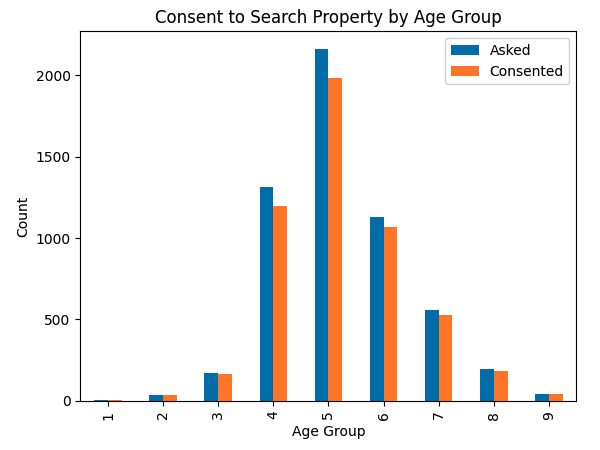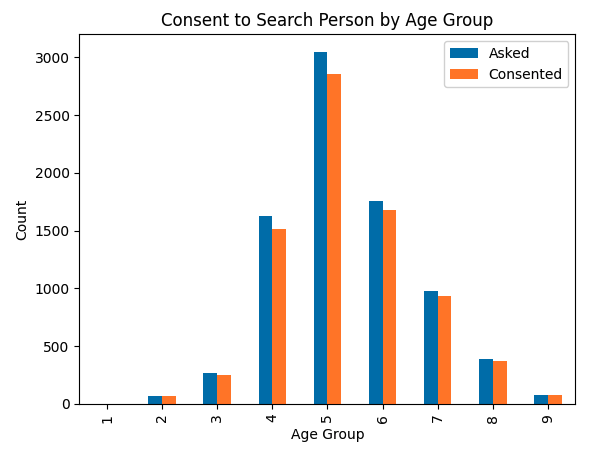

Where age groups are defined as:
 - (1) 1-9
 - (2) 10-14
 - (3) 15-17
 - (4) 18-24
 - (5) 25-34
 - (6) 35-44
 - (7) 45-54
 - (8) 55-64
 - (9) 65 and older

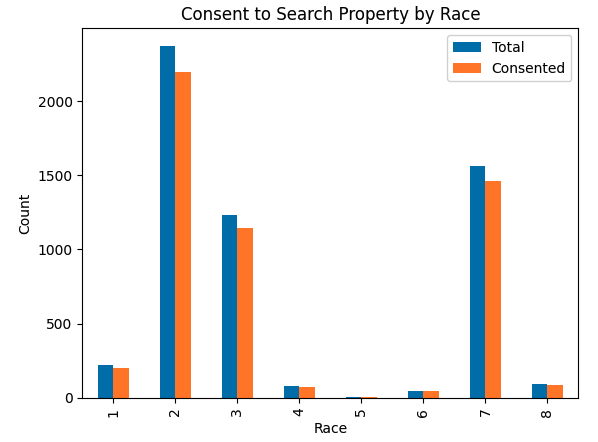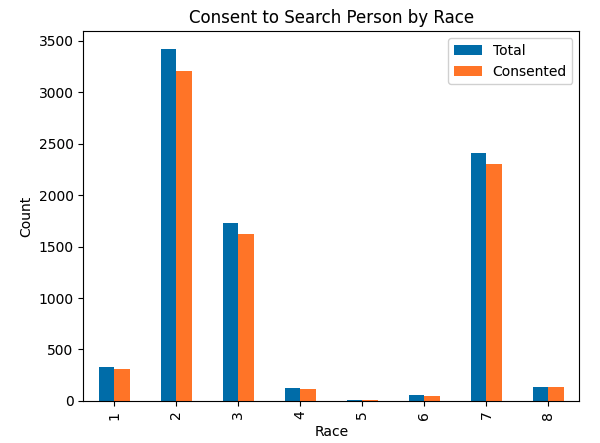

Where race is defined as:
  - (1) Asian
  - (2) Black/African American
  - (3) Hispanic/Latino
  - (4) Middle Eastern/South Asian
  - (5) Native American
  - (6) Pacific Islander
  - (7) White
  - (8) Multiracial
  - (9) Unknown

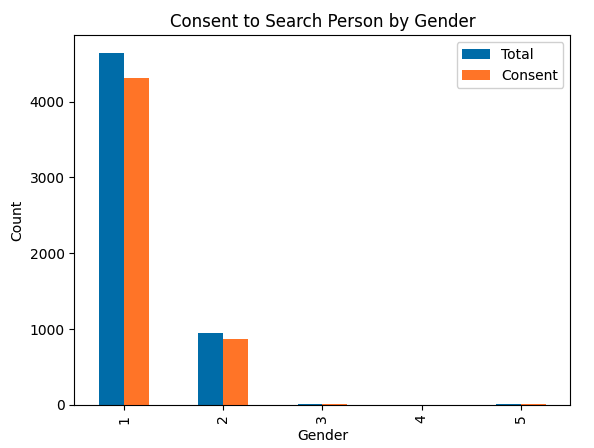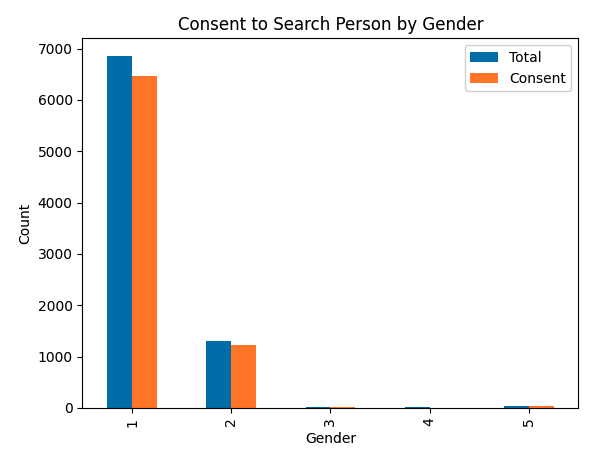

Where gender is defined as:
  - (1) Male
  - (2) Female
  - (3) Transgender Man
  - (4) Transgender Woman
  - (5) Gender Nonconforming

However, after visualization of these primary demographic characteristics, we noticed that it might be difficult to create an effective model if the amount who **do** consent is always very close to the total amount of people who are asked for consent. Creating a random forest model can be challenging when there is an imbalanced distribution of data between the target outcome and the alternative outcome. In such cases, where there is a large amount of data with the target outcome and very little data with the alternative outcome, the model might become biased, have limited representation, and overfit the data.

Since random forest models rely on the principle of bagging, which involves creating multiple decision trees by resampling the data, when there is an imbalance in the distribution of outcomes, the majority class (target outcome) tends to dominate the resampled datasets. As a result, the random forest model may become biased towards the majority class, leading to poor performance in predicting the minority class (alternative outcome). Moreover, with limited data representing the alternative outcome, it becomes challenging for the model to learn the underlying patterns and relationships associated with that outcome.  When there especially is a significant class imbalance, the random forest model may struggle to generalize well to unseen data. It can easily become overfit to the majority class, leading to poor performance on minority class instances. The model might simply assign all instances to the majority class, as it achieves high accuracy on the imbalanced training data but fails to capture the patterns of the minority class.

In our case, although we would not be able to tell based solely on our predictive model, our judgement about the distribution of the demographic characteristics led us to explore an alternative route: to use the top 5 reasonable features from a correlation matrix.


By creating a correlation matrix (colorized for visualization and selection purposes), we are able to see which characteristics in our data are most correlated to our target variables (body and property searches).

NOTE: We broke down the matrix into multiple, 6 smaller sub-matrices because one large matrix is too infeasible (visually) to analyze by itself.

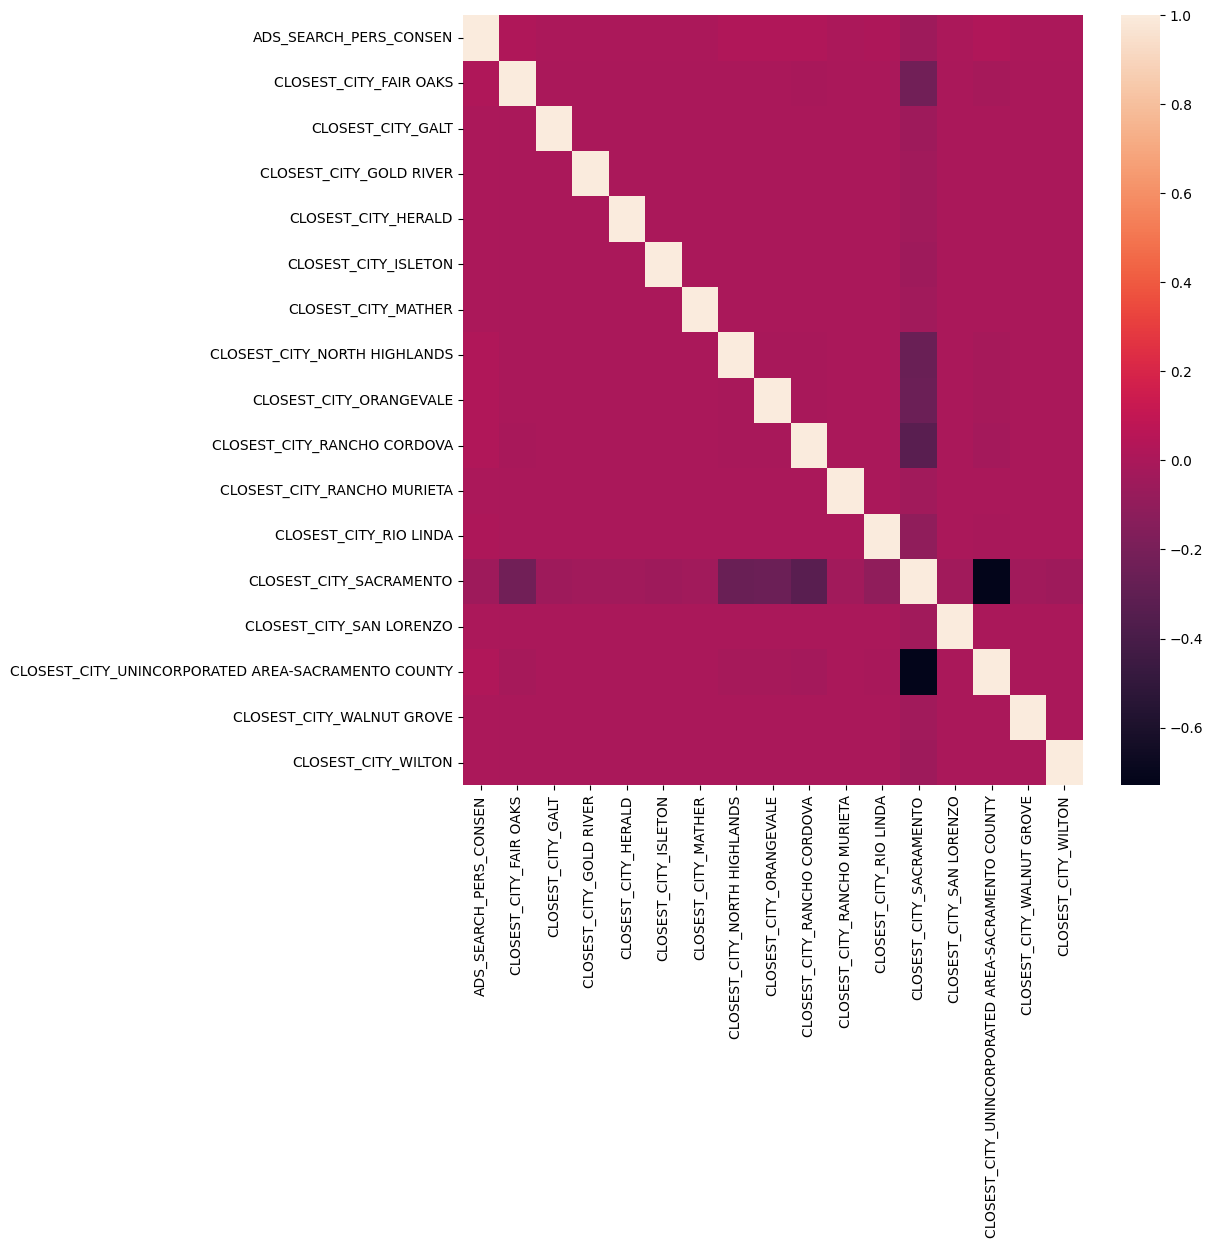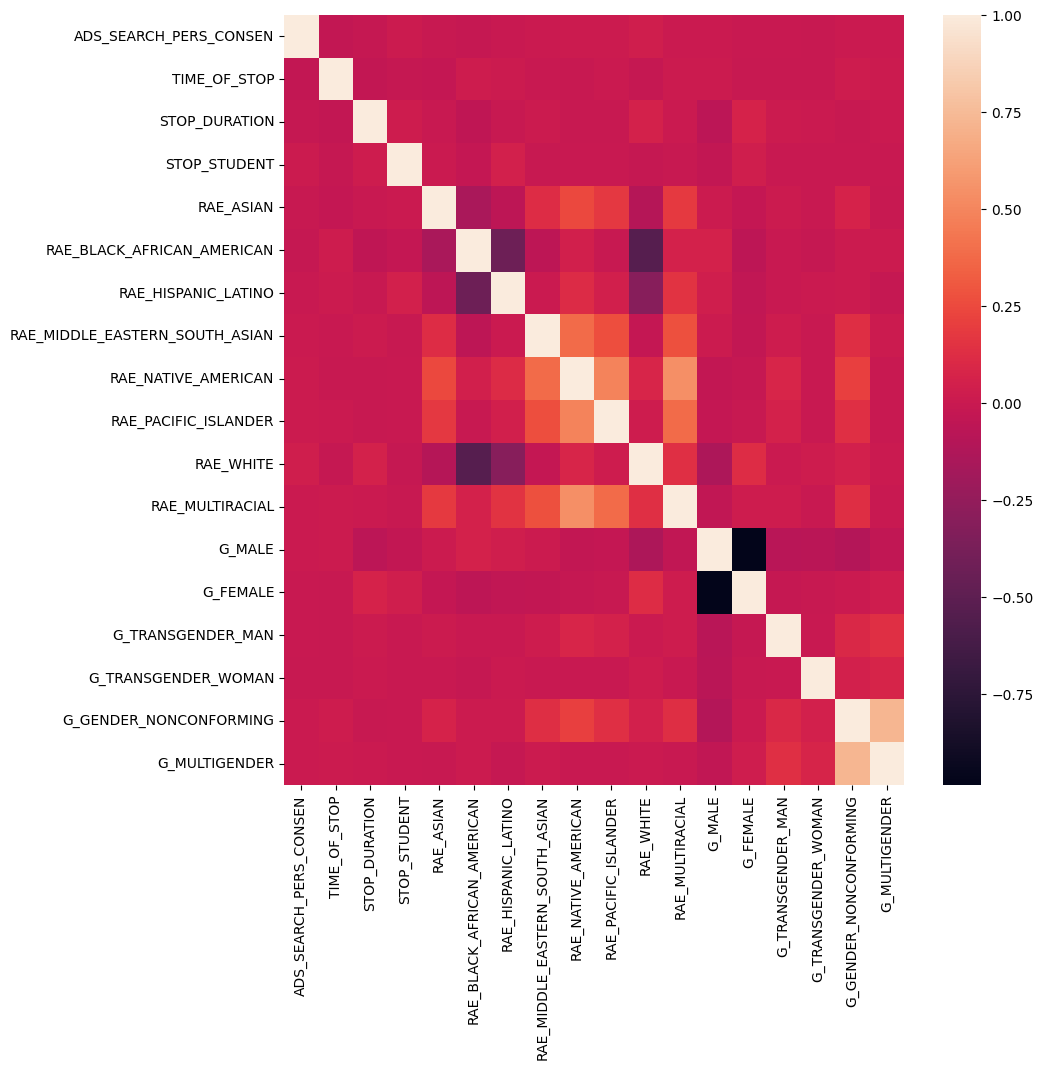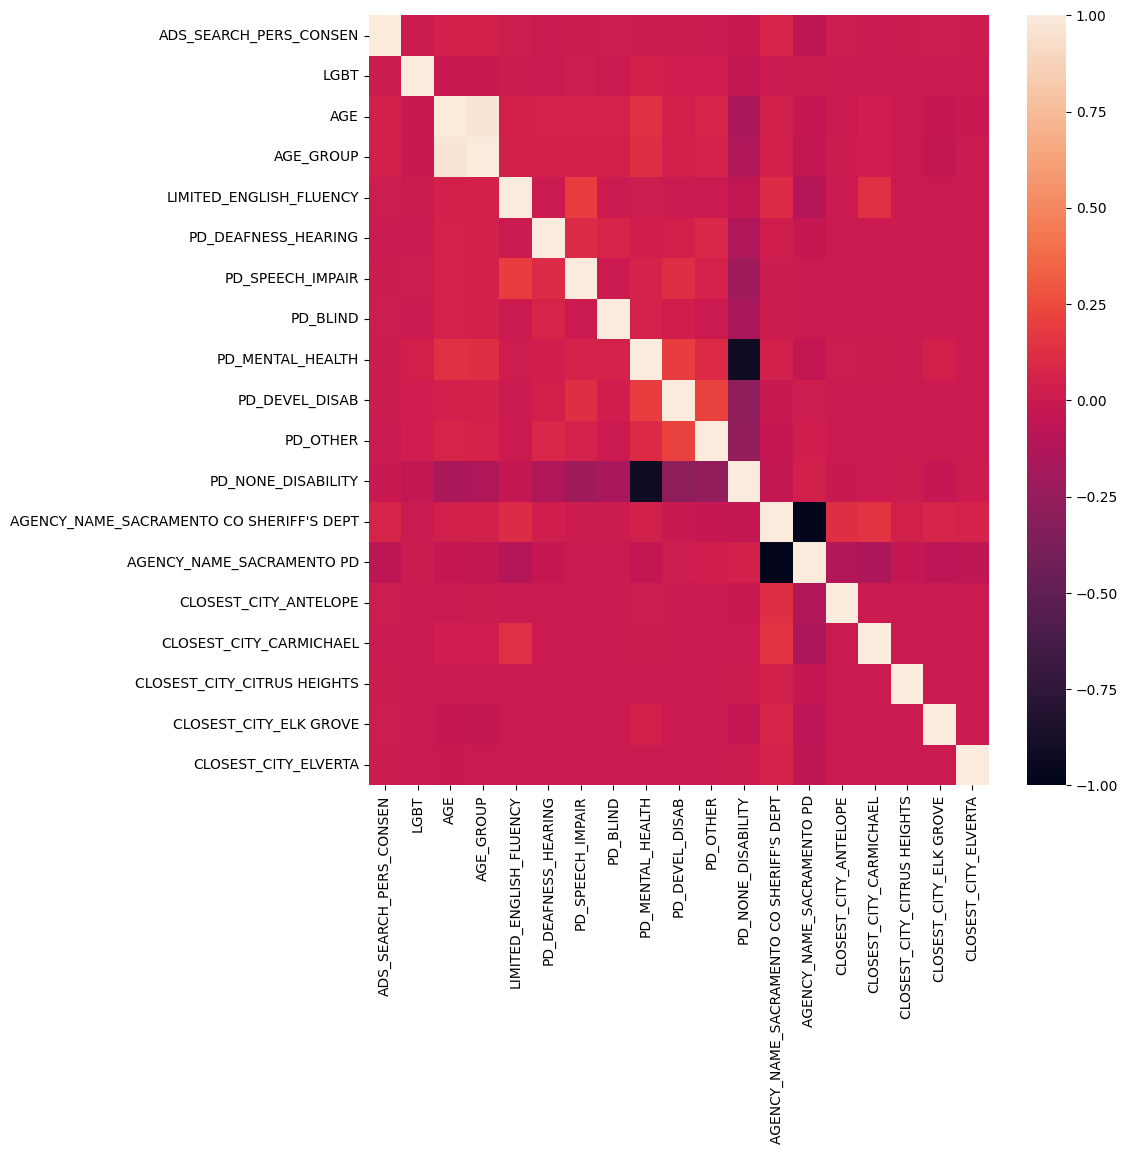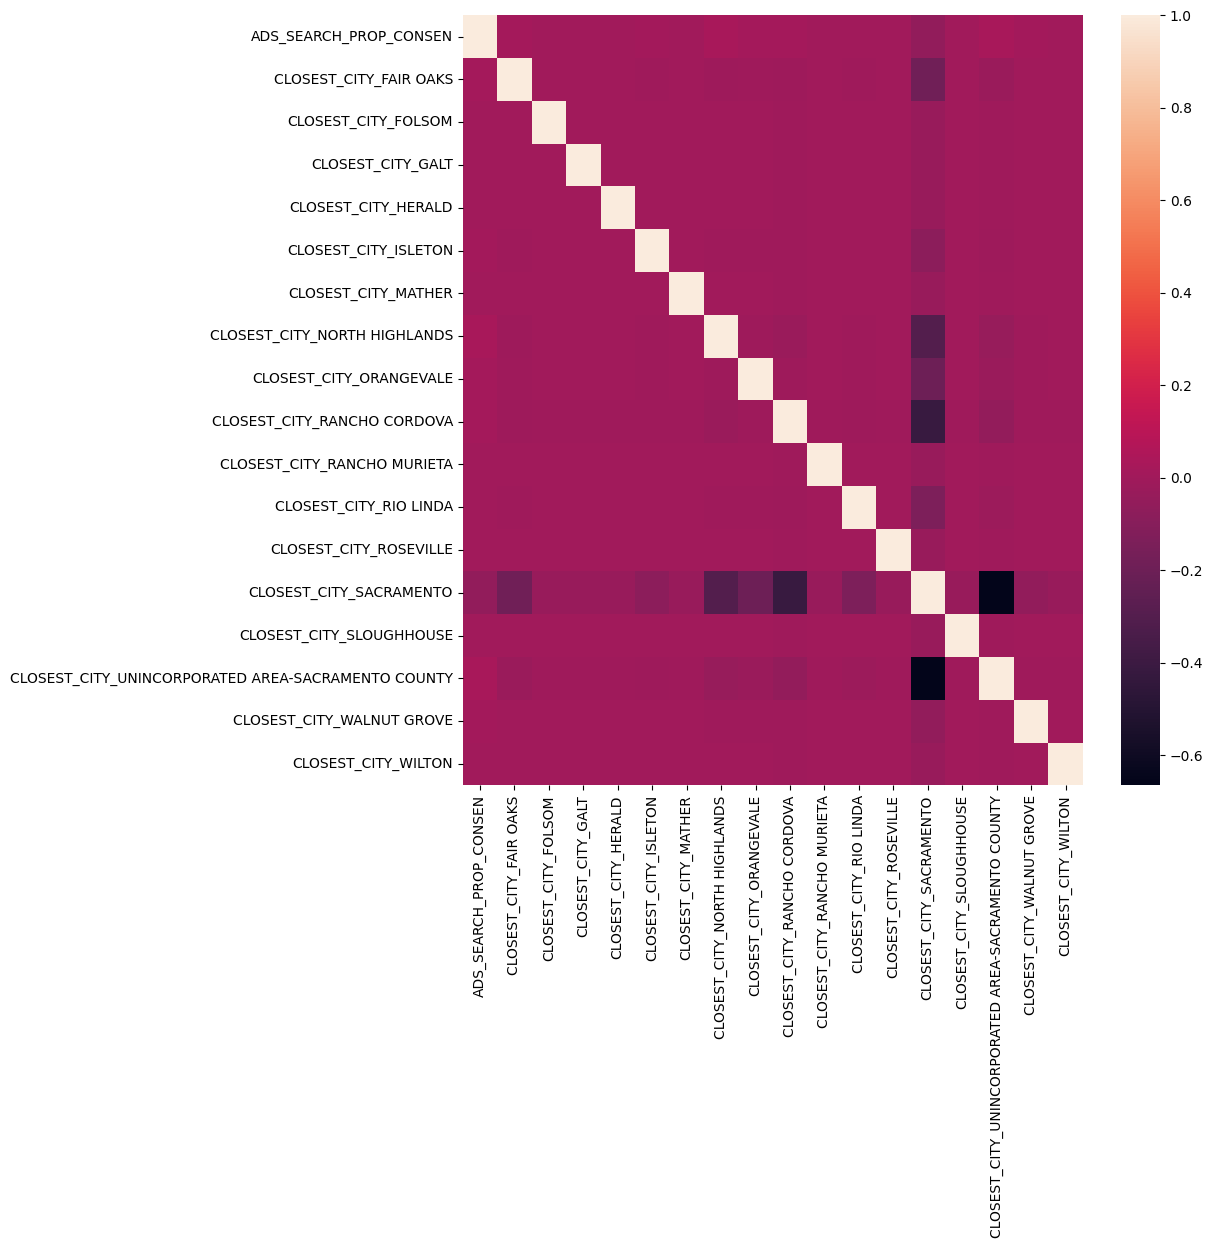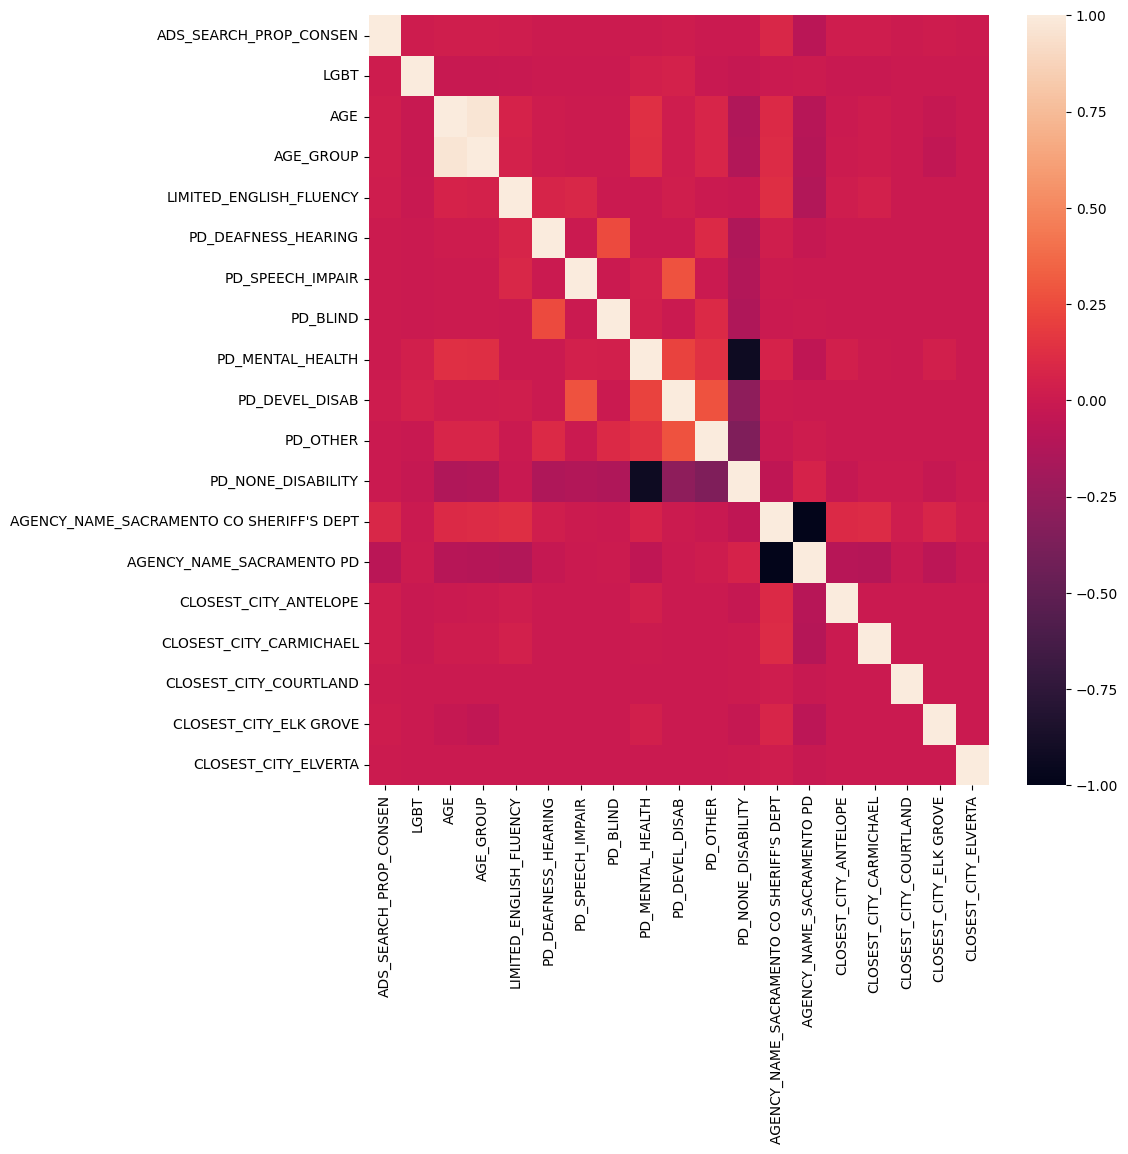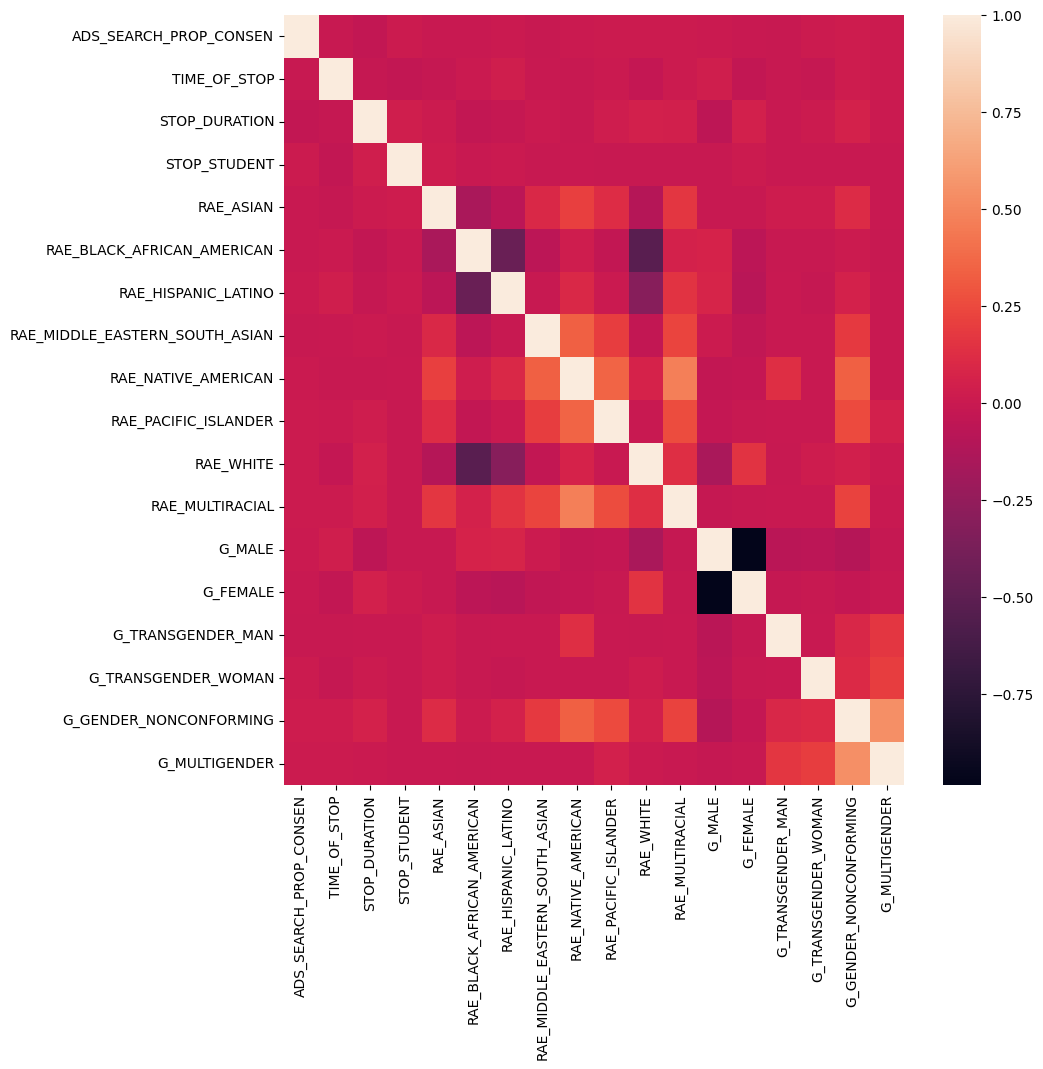

After careful and thorough inspection of the correlation matrix, we decided to use 13 different variables to train our predictive model on. The variables include:
- Stop Duration
- Whether the person stopped was a student (1), or not (0)
- Race: Black/African American
- Race: White
- Age
- Disability: Auditory Deafness
- Disability: No Disability
- Whether the stopping agency was the Sacramento Police Department (1), or not (0)
- Closest City: Antelope
- Closest City: North Highlands
- Closest City: Orangevale
- Closest City: Rancho Cordova
- Closest City: Sacramento


However, as we continued with these variables and created OLS, Logistic Regression, and Random Forest Models, we found that it was not possible to create an effective model based on our hyperparameters. We hoped that with a better set of hyperparameters, we might be able to train a random forest model that performs noticeably better than a trivial model. We performed grid search on both searches of property and person, but both output models with default hyperparameter values and similarly dissapointing confusion matrices. Unfortunately, this likely means that with only the RIPA dataset it's impossible to train an effective model to predict whether or not a person will consent to a search. However, we can still learn something from these models by inspecting which features they believed to have the most predictive power.

Of our OLS, Logistic Regression, and Random Forest Models, we have included here our best Random Forest model.

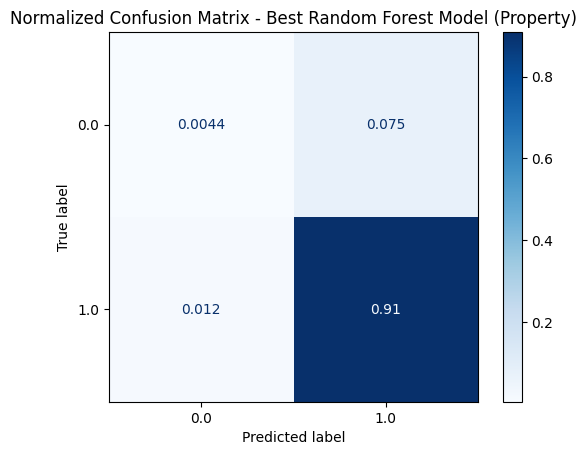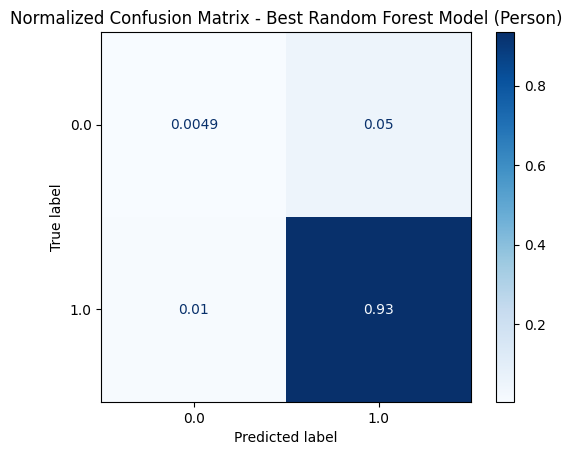

From our models, the top 4 features with the greatest predictive power for **both** person and property searches were:

- Race: Black/African American
- Race: White
- Age
- Stop Duration

As a result, we ran AB tests on each of the features and consent to see if there is a statistically significant association between any of them and consenting to a search.

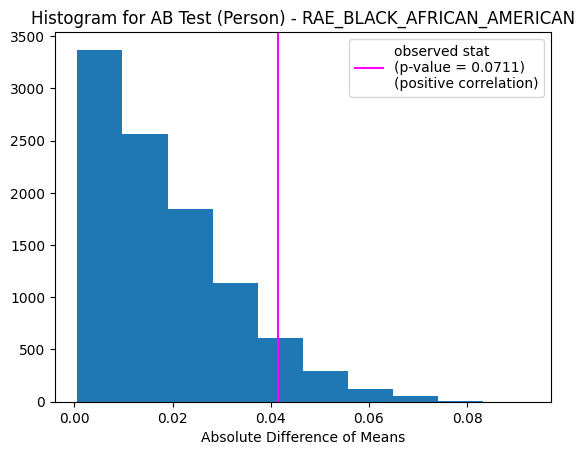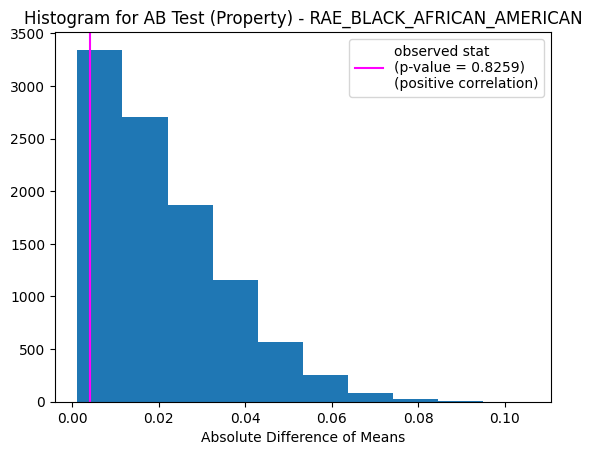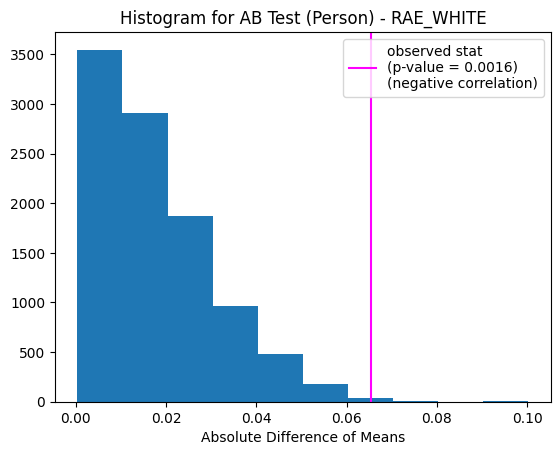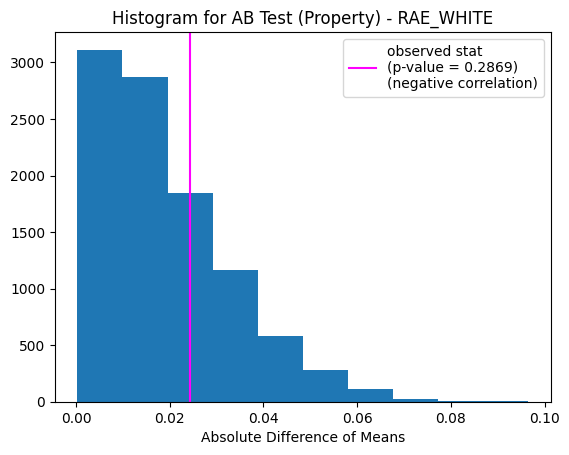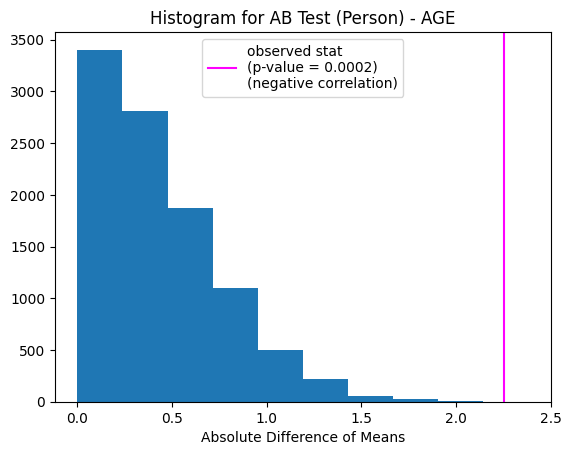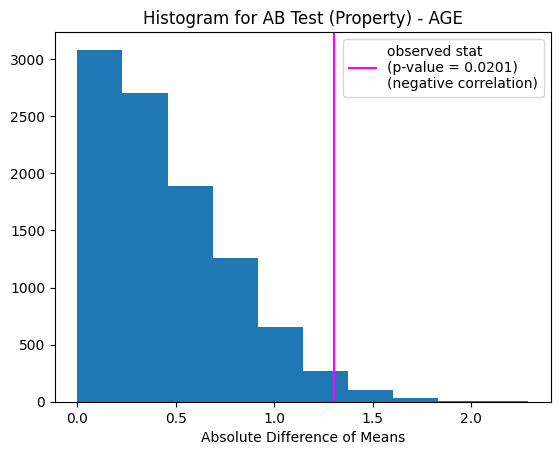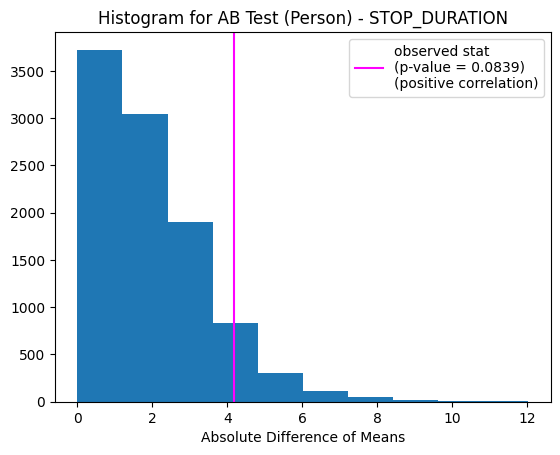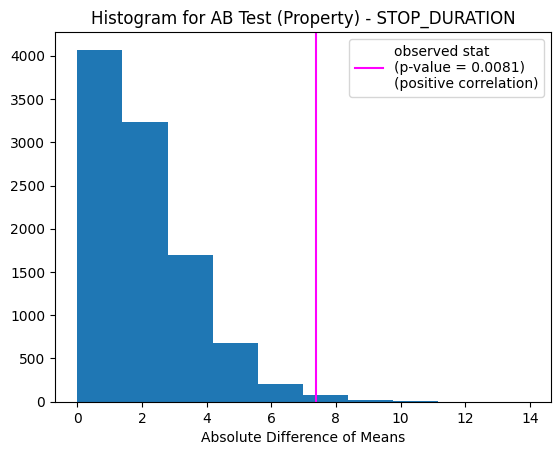

Any test with a p-value greater than or equal to 0.05 shows a statistically significant correlation, which is the case for several!

Here is the exact breakdown of p-values for all AB tests:
- Consent to search **property** vs. **duration of stop**: 0.009 (Statistically significant!)
- Consent to search **person** vs. **duration of stop**: 0.0818
- Consent to search **property** vs. **age**: 0.0213 (Statistically significant!)
- Consent to search **person** vs. **age**: 0.0001 (Statistically significant!)
- Consent to search **property** vs. **race=white**: 0.2843
- Consent to search **person** vs. **race=white**: 0.0024 (Statistically significant!)
- Consent to search **property** vs. **race=black**: 0.8342
- Consent to search **person** vs. **race=black**: 0.077

Interestingly enough, this is the first time we are seeing noticeable differences between searches of person and searches of property.

# **Concluding Remarks**

## Methodology Changes in Light of Data
After isolating which variables had the highest levels of correlation with respect to our target columns, we computed a confusion matrix that yielded a 1 (true) result in every case in order to create a baseline comparison to which we could compare our new models against.

That said, after having seen the results from the confusion matrices, we are deciding to use the Random Forest model primarily for two reasons. First and foremost, compared to the other models (OLS and Logistic Regression) we see that the Random Forest model only appears to be a more accurate version of our baseline matrix with reductions in the false postive and false negative categories, while also providing predictions in our negative category compared to the other models. Our secondary reason for deciding on Random Forest modeling is because it is the most "malleable" of the modeling types. This is because we can alter the number of trees we decide to use in the model, and even still are less prone to overfitting since they can average over multiple decision trees (as compared to say, decision tree modeling).

## Conclusions Drawn From Analysis

Generally speaking, this project had lots of twists and turns, from the features we thought would have the greatest predictive value, versus what actually had a high level of predictive value, as well as model training based on the distribution of our target outcome and alternative outcome. Ultimately, we saw that only 4 variables had a reasonable level of predictive power in determining who does and does not consent to a body or property search: age, duration of stop, whether the person stopped was White, or whether the person stopped was Black. The first statistically significant association is between stop duration and consent to a property search, which makes sense as a search will likely result in a longer stop. The next three conclusions are more interesting. Younger people are associated with a higher likelihood of consenting to searches of their property and person, and white people are associated with a lower likelihood of consenting searches of their person. It's tough to know for sure why this is the case, but one reasonable explanation would be that older people and white people are more comfortable around the police, therefore they are more likely to consent to a search.

Something that could help with the research of this topic in the future is perhaps using instrumental variables to help with potential endogeneity, omitted variable bias, and causal relationship inferencing. By identifying instrumental variables that are correlated with the independent variable but not with the error term, once can mitigate endogeneity issues in determining whether or not someone will consent to a body/property search. IVs could then help create a more reliable and unbiased estimate of the relationship between the independent variable and the outcome, improving the predictive power of the model. Similarly, using instrumental variables can serve as proxies for omitted variables, capturing their effects indirectly. By including IVs that are correlated with the omitted variables but not with the outcome, one could then determine whether there are other variables that have an impact on whether or not a traffic stop occurs, but does not effect the outcome directly. An example of this could be using whether or not the person was found guilty at the end of their body/property search or trial which could indicate that the person might act differently and might, consequently, choose differently when asked for body/property search consent. Altogether, using instrumental variables could be a useful tool when our dataset contains other variables that could have an impact on our explanatory variables (making them endogenous), and help better infer causality between our variables of choice.

We are happy with the way that our research and analysis went, and although this project did not provide definitive conclusions, it provided some interesting conclusions that can definitely be explored at a later point by researchers.


In [ ]:
#%%shell
#jupyter nbconvert --to html /content/Modeling_and_Analysis.ipynb